<a href="https://colab.research.google.com/github/Fitrah-Andhika-Ramadhan/Proyek_Akhir_Dicoding_Klasifikasi_Gambar/blob/main/Proyek_Akhir_Klasifikasi_Gambar_Fitrah_Andhika_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Mengunduh Dataset dari github
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [ ]:
# Persiapan Dataset
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf

base_dir = 'rockpaperscissors/rps-cv-images'
train_dir = 'data/train'
val_dir = 'data/val'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

categories = ['rock', 'paper', 'scissors']

for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    category_path = os.path.join(base_dir, category)
    images = os.listdir(category_path)
    train_images, val_images = train_test_split(images, test_size=0.4, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))

    for img in val_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(val_dir, category, img))


In [ ]:
# 4. Augmentasi Gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# Resetting the session to prevent bias
tf.keras.backend.clear_session()

In [ ]:
# 5. Membangun Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 6. Melatih Model
import time

start_time = time.time()

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

end_time = time.time()
training_time = end_time - start_time

print(f'Training time: {training_time:.2f} seconds')


Epoch 1/30
41/41 [==============================] - 20s 321ms/step - loss: 1.2301 - accuracy: 0.3628 - val_loss: 1.0786 - val_accuracy: 0.3390
Epoch 2/30
41/41 [==============================] - 14s 343ms/step - loss: 1.0380 - accuracy: 0.4520 - val_loss: 0.9126 - val_accuracy: 0.5479
Epoch 3/30
41/41 [==============================] - 15s 358ms/step - loss: 0.9289 - accuracy: 0.5663 - val_loss: 0.5843 - val_accuracy: 0.8710
Epoch 4/30
41/41 [==============================] - 13s 307ms/step - loss: 0.6979 - accuracy: 0.7027 - val_loss: 0.4070 - val_accuracy: 0.8619
Epoch 5/30
41/41 [==============================] - 12s 299ms/step - loss: 0.5825 - accuracy: 0.7721 - val_loss: 0.3397 - val_accuracy: 0.9121
Epoch 6/30
41/41 [==============================] - 12s 295ms/step - loss: 0.4975 - accuracy: 0.7965 - val_loss: 0.3201 - val_accuracy: 0.8573
Epoch 7/30
41/41 [==============================] - 12s 291ms/step - loss: 0.4732 - accuracy: 0.8056 - val_loss: 0.2600 - val_accuracy: 0.9406

In [ ]:
# Evaluasi Model
val_loss, val_acc = model.evaluate(val_generator, steps=len(val_generator))
val_acc_percent = val_acc * 100
print(f'Validation accuracy: {val_acc_percent:.2f}%')


import matplotlib.pyplot as plt

28/28 [==============================] - 2s 76ms/step - loss: 0.0528 - accuracy: 0.9817
Validation accuracy: 98.17%


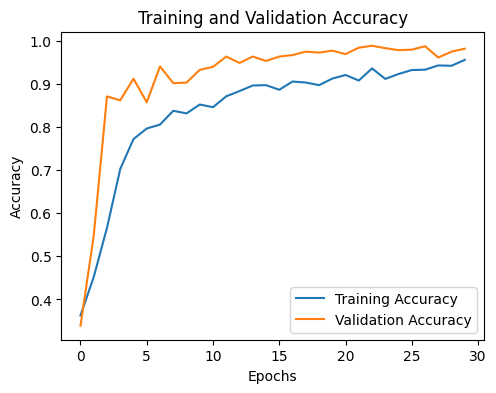

In [ ]:
# Membuat plot untuk akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

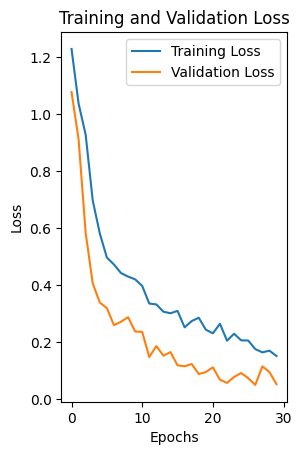

In [ ]:
# Membuat plot untuk kehilangan (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Menampilkan plot
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

<Figure size 640x480 with 0 Axes>

Saving image_proyek.JPG to image_proyek (6).JPG
1/1 [==============================] - 0s 20ms/step


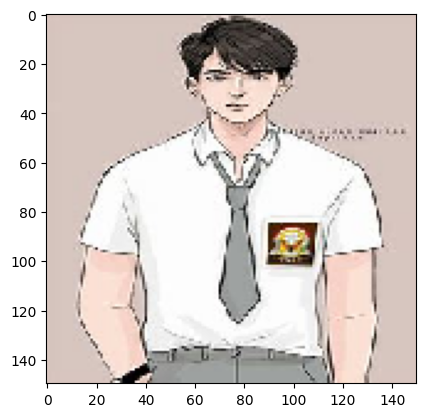

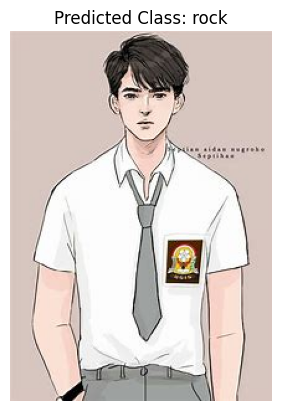

In [ ]:
# dataset gambar permainan rock/paper/scissors
# Mengunggah gambar
class_labels = ['rock', 'paper', 'scissors']
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    # Hasil prediksi gambar
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    class_idx = np.argmax(classes)
    predicted_class = class_labels[class_idx]

    plt.figure()
    plt.imshow(image.load_img(path))
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()




In [ ]:
# 9. Menambahkan Data Diri

nama_lengkap = "FITRAH ANDHIKA RAMADHAN"
id_dicoding = "fitrah_ramdhan"

print(f"Nama: {nama_lengkap}")
print(f"ID Dicoding: {id_dicoding}")

Nama: FITRAH ANDHIKA RAMADHAN
ID Dicoding: fitrah_ramdhan
